In [5]:
# importer les packs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # visualisation
import seaborn as sns #aussi
#deployer un modele et lutiliser dans une app
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [6]:
data= pd.read_csv("C:\\Users\\pc\\Desktop\\train_u6lujuX_CVtuZ9i.csv")

In [7]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#voir les valeur manquant

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#verifier la base
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## renseigner les valeur manquantes

In [54]:
#diviser la base en cat_data bdd categorique et num_data pour les numero
cat_data=[]
num_data=[]
for i,c in enumerate(data.dtypes):
    if c==object:
        cat_data.append(data.iloc[:,i])
    else:
        num_data.append(data.iloc[:,i])
    

In [56]:
cat_data=pd.DataFrame(cat_data).transpose()

#cava safficher en inverse la solution c tranpose

In [58]:
num_data=pd.DataFrame(num_data).transpose()


In [60]:
#remplacer les val manq de cat avec la valeur qui se repete le plus
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [62]:
cat_data['Gender'].value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [64]:
#pour les num on va remplacer la valeur manq avec la valeur davant
num_data.bfill(inplace=True)

In [66]:
num_data.isnull().sum().any()

False

In [68]:
#transformer la colonne loan status
target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)

In [70]:
target.head

<bound method NDFrame.head of 0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64>

In [72]:
le = LabelEncoder()

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
    
    # Afficher la correspondance pour chaque colonne
    print(f"Colonne: {i}")
    for category, encoded in zip(le.classes_, range(len(le.classes_))):
        print(f"{category} -> {encoded}")
    print("-" * 30)  # Séparateur pour chaque colonne


Colonne: Loan_ID
LP001002 -> 0
LP001003 -> 1
LP001005 -> 2
LP001006 -> 3
LP001008 -> 4
LP001011 -> 5
LP001013 -> 6
LP001014 -> 7
LP001018 -> 8
LP001020 -> 9
LP001024 -> 10
LP001027 -> 11
LP001028 -> 12
LP001029 -> 13
LP001030 -> 14
LP001032 -> 15
LP001034 -> 16
LP001036 -> 17
LP001038 -> 18
LP001041 -> 19
LP001043 -> 20
LP001046 -> 21
LP001047 -> 22
LP001050 -> 23
LP001052 -> 24
LP001066 -> 25
LP001068 -> 26
LP001073 -> 27
LP001086 -> 28
LP001087 -> 29
LP001091 -> 30
LP001095 -> 31
LP001097 -> 32
LP001098 -> 33
LP001100 -> 34
LP001106 -> 35
LP001109 -> 36
LP001112 -> 37
LP001114 -> 38
LP001116 -> 39
LP001119 -> 40
LP001120 -> 41
LP001123 -> 42
LP001131 -> 43
LP001136 -> 44
LP001137 -> 45
LP001138 -> 46
LP001144 -> 47
LP001146 -> 48
LP001151 -> 49
LP001155 -> 50
LP001157 -> 51
LP001164 -> 52
LP001179 -> 53
LP001186 -> 54
LP001194 -> 55
LP001195 -> 56
LP001197 -> 57
LP001198 -> 58
LP001199 -> 59
LP001205 -> 60
LP001206 -> 61
LP001207 -> 62
LP001213 -> 63
LP001222 -> 64
LP001225 -> 65
LP0

In [50]:
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
...,...,...,...,...,...,...
609,0,0,0,0,0,0
610,1,1,3,0,0,0
611,1,1,1,0,0,2
612,1,1,2,0,0,2


In [41]:
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [43]:
#concatener cat et num data
X=pd.concat([cat_data,num_data],axis=1)
y=target

In [46]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0


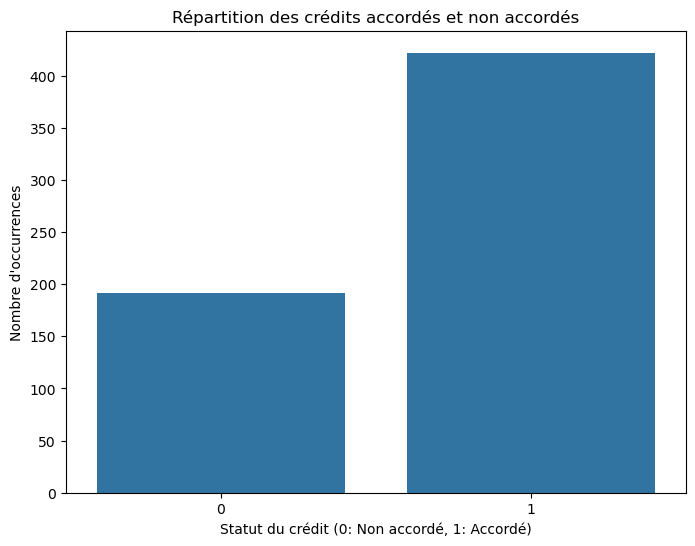

Le % des crédits accordés est de : 68.73%
Le % des crédits non accordés est de : 31.27%


In [43]:
# Visualisation avec countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=target)
plt.title("Répartition des crédits accordés et non accordés")
plt.xlabel("Statut du crédit (0: Non accordé, 1: Accordé)")
plt.ylabel("Nombre d'occurrences")
plt.show()

# Calcul des pourcentages
yes = target.value_counts()[1]/len(target)*100
no = target.value_counts()[0]/len(target)*100
# Affichage des résultats
print(f"Le % des crédits accordés est de : {yes:.2f}%")
print(f"Le % des crédits non accordés est de : {no:.2f}%")


# ANALYSE EXPLORATOIRE

In [46]:
df=pd.concat([cat_data,num_data,target],axis=1)

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


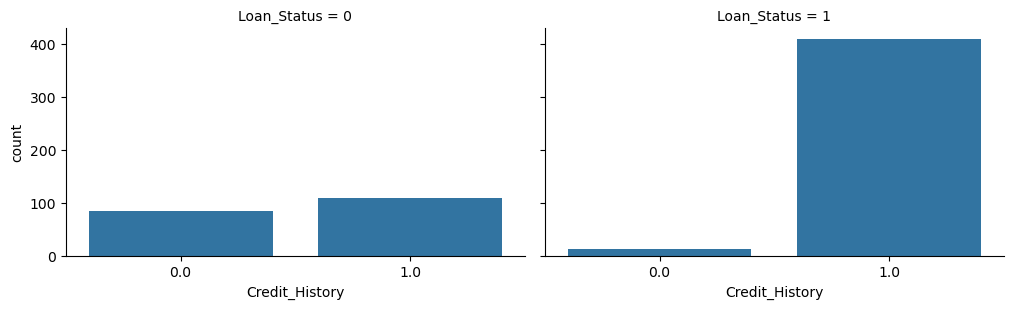

In [48]:
#credit history
grid=sns.FacetGrid(df,col='Loan_Status',height=3.2,aspect=1.6)
grid.map(sns.countplot,'Credit_History')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


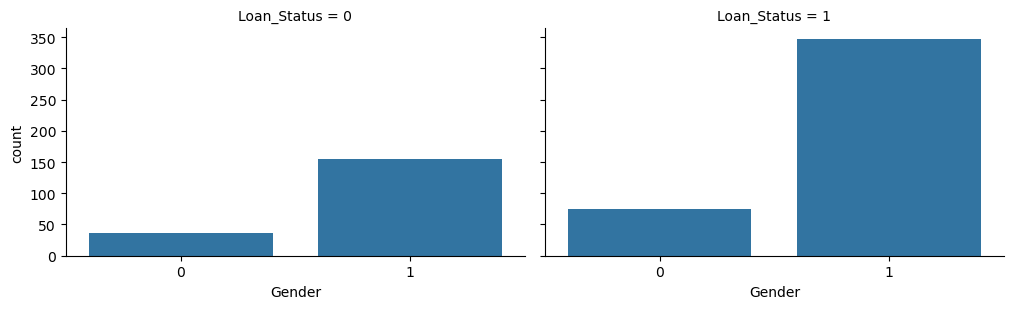

In [50]:
#
grid=sns.FacetGrid(df,col='Loan_Status',height=3.2,aspect=1.6)
grid.map(sns.countplot,'Gender')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


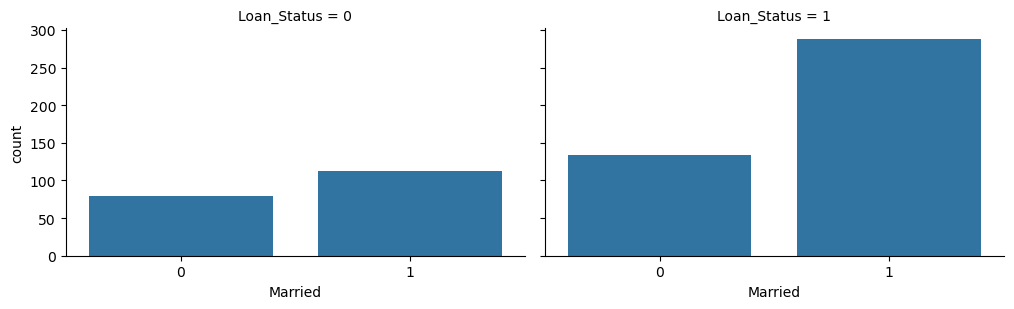

In [52]:
#credit history
grid=sns.FacetGrid(df,col='Loan_Status',height=3.2,aspect=1.6)
grid.map(sns.countplot,'Married')

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


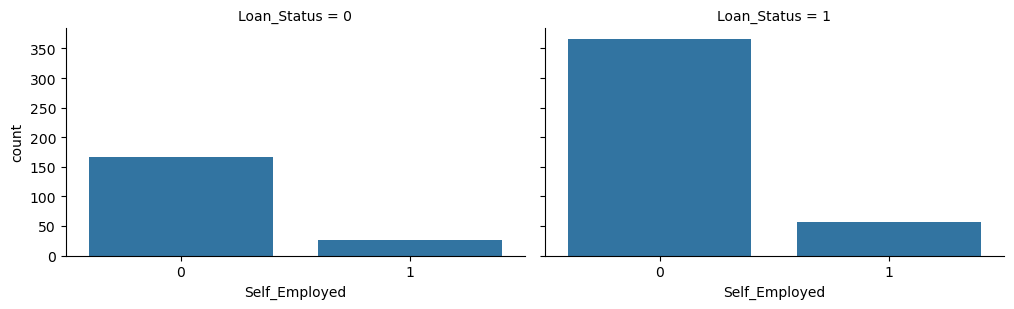

In [54]:
#credit history
grid=sns.FacetGrid(df,col='Loan_Status',height=3.2,aspect=1.6)
grid.map(sns.countplot,'Self_Employed')

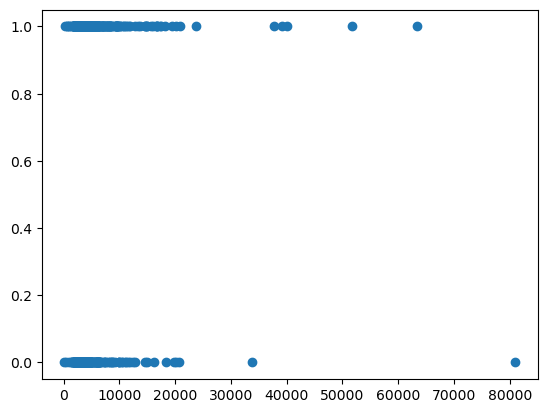

In [56]:
#nuage de points revenue des demandeurs
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

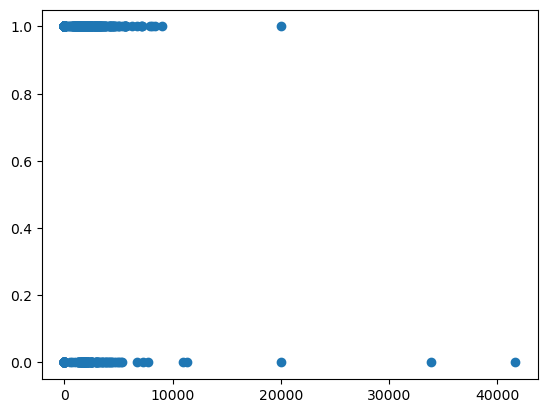

In [58]:
#nuage de points revenue des demandeurs
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

In [60]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


# diviser la bbd en test,train


In [69]:
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [71]:
for train,test in sss.split(X,y):
    X_train,X_test=X.iloc[train],X.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]

In [73]:
print('la taille de x_train: ',X_train.shape)
print('la taille de x_test: ',X_test.shape)
print('la taille de y_train: ',y_train.shape)
print('la taille de y_test: ',y_test.shape)

la taille de x_train:  (491, 11)
la taille de x_test:  (123, 11)
la taille de y_train:  (491,)
la taille de y_test:  (123,)


# Car on est dans un probleme de classification on va appliquer KNN,REGRESSION LOGISTIC, ARBRED DE DECISION

In [76]:
models={'LogisticRegression':LogisticRegression(random_state=42),
'KNeighborsClassifier':KNeighborsClassifier(),
'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)}

#fonction de precision
def acc(y_true,y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'la precision du model est : {acc}')


In [78]:
#fonction d'application des model

In [80]:
def train_test_eval(models,X_train,y_train,X_test,y_test):
    for name,model in models.items():
        print(name,':')
        model.fit(X_train,y_train)
        acc(y_test,model.predict(X_test))
        print('-'*30)

In [147]:
train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
la precision du model est : 0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision du model est : 0.6504065040650406
------------------------------
DecisionTreeClassifier :
la precision du model est : 0.8455284552845529
------------------------------


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
regressor=LogisticRegression()
regressor.fit(X,y)

C:\Users\pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
#enregistrer le model
pickle.dump(regressor,open('model.pkl','wb'))

In [88]:
X

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0
